#### todo #3: translate BETD to german
#### todo #4: make topic modeling for separate sources
#### todo #5: go through text analytics book to comment code on what is happening to write about this in paper
#### todo #6: re.sub terms in topics that make no sense

# Topic Modeling of Solar Renewable Energy Projects

# 1) Data

## 1a) Add DENA info to df

### Importing DENA files to a df

In [1]:
import os # reads directory of stored DENA pdfs
import re # regex is used for finding date published of DENA report
import pandas as pd
from pdfminer.high_level import extract_text # reads pdf

df = pd.DataFrame(columns = ["name", "year", "doc", "BETD", "DENA", "news", "txt_sim_news", "txt_sim_fce", "txt_sim_proj"])

directory = 'DENA'

for filename in os.listdir(directory):
    file = os.path.join(directory,filename)
    if os.path.isfile(file):
        document = extract_text(file)
        filename = filename.rstrip('.pdf')
        reg_date = re.findall('2017|2018|2019|2020|2021|2022', document)

        year = ''
        if reg_date:
            year  = reg_date[0]
        if not reg_date:
            reg_date = re.findall('2018|2019|2020|2021|2022', filename)
            if reg_date:
                year = reg_date[0]
            if not reg_date:
                year = 'na'
        # insert to df
        df.loc[-1] = [filename, year ,document, 0, 1, 0, 'na', 'na', 'na']
        df.index = df.index + 1
        df = df.sort_index()

print(df)
# print(df['doc'].iloc[2])

                                                  name  year  \
0    Report_Status_and_Perspectives_of_Renewable_En...  2017   
1                               9168_RES-Projekt_Ghana  2020   
2    dena-Umfrage_Kuenstliche_Intelligenz_in_der_En...  2021   
3          9265_dena_Kurzanalyse_Vermiedene_Netzkosten  2018   
4                                HZwei_April_2020_dena  2020   
..                                                 ...   ...   
100                     9179_RES-Projekt_Tadschikistan  2020   
101            dena-ANALYSE_Marktmonitoring_Bioenergie  2021   
102  Abschlussbericht_dena-Leitstudie_Aufbruch_Klim...  2021   
103           POSITIONSPAPIER_EEG-Novelle_Layout_final  2021   
104  dena-Abschlussbericht_Wirksamer_Klimaschutz_du...  2019   

                                                   doc  BETD  DENA  news  \
0    Report \nStatus and Perspectives of  \nRenewab...     0     1     0   
1    dena-ReneWaBLe-eneRgy-SoLuTIonS-PRogRaMM\ndena...     0     1     0   
2  

### Cleaning DENA files

In [2]:
#todo: clean files
#todo: drop all columns that are not within date range after fixing files
# df.drop(axis=0, index=0, inplace=True)
# df['year'].iloc[112] = 2019
# df['doc'].iloc[112] = ''
# print(df['doc'].iloc[111])

In [3]:
# TEAM: make this cell to loop through df and manually add year at index, n=65

## 1b) Importing BETD files

In [4]:
directories = ['BETD18', 'BETD19', 'BETD21', 'BETD22']
year = 2018
for directory in directories:
    if year == 2020:
        year = year + 1
    for filename in os.listdir(directory):
        file = os.path.join(directory,filename)
        if os.path.isfile(file):
            with open(file) as f:
                document = f.readlines()
            filename = filename.rstrip('.pdf')

            # insert to df
            df.loc[-1] = [filename, year ,document, 1, 0, 0, 'na', 'na', 'na']
            df.index = df.index + 1
            df = df.sort_index()
    year = year + 1

## 1c) Importing newspapers

In [5]:
from pdfminer.high_level import extract_text

directory = 'newspapers'

for filename in os.listdir(directory):
    file = os.path.join(directory,filename)
    if os.path.isfile(file):
        document = extract_text(file)
        filename = filename.rstrip('.pdf')
        reg_date = re.findall('2017|2018|2019|2020|2021|2022', document)

        year = ''
        if reg_date:
            year  = reg_date[0]
        # insert to df
        df.loc[-1] = [filename, year ,document, 0, 0, 1, 'na', 'na', 'na']
        df.index = df.index + 1
        df = df.sort_index()

print(df)

                                                  name  year  \
0                        Solarbranche_in_Erklärungsnot  2021   
1                      Endspiel_für_die_Klimakanzlerin  2019   
2                                   Blick_in_die_Sonne  2022   
3    Die_allermeisten_Deutschen_haben_es_warm_genug...  2018   
4                               Sonne_mach_mich_reich_  2018   
..                                                 ...   ...   
738                     9179_RES-Projekt_Tadschikistan  2020   
739            dena-ANALYSE_Marktmonitoring_Bioenergie  2021   
740  Abschlussbericht_dena-Leitstudie_Aufbruch_Klim...  2021   
741           POSITIONSPAPIER_EEG-Novelle_Layout_final  2021   
742  dena-Abschlussbericht_Wirksamer_Klimaschutz_du...  2019   

                                                   doc  BETD  DENA  news  \
0    Solarbranche in Erklärungsnot\n\nHandelsblatt ...     0     0     1   
1    Endspiel für die Klimakanzlerin\n\nHandelsblat...     0     0     1   
2  

## 1d) Detect language in df cell and translate inplace

In [6]:
# # DeepL api integration (must have account for api to run cell)
# # todo: change deepl plan on sunday and translate docs by hand
# import deepl
# import os
#
#
# auth_key = 'f662f5bf-7f3d-be65-adeb-58ede2943e8f'
# translater = deepl.Translator(auth_key)
#
# directories = ['BETD18', 'BETD19', 'BETD21', 'BETD22']
# out_directory = 'en'
#
# for directory in directories:
#     for filename in os.listdir(directory):
#         in_file = os.path.join(directory,filename)
#         out_file = os.path.join(out_directory,directory,filename)
#         if os.path.isfile(in_file):
#             if filename in os.listdir(os.path.join(out_directory,directory)):
#                 continue
#
#             with open(out_file, 'w') as f:
#                 in_file = open(in_file)
#                 in_file_contents = in_file.read()
#                 print(in_file_contents)
#                 # in_file_contents_ary = in
#                 in_file_contents = translater.translate_text(text=in_file, target_lang='DE', split_sentences='nonewlines').text
#                 out_file = f.write(in_file_contents)
#                 in_file.close()
#                 f.close()
#
#


# 2) Text Preprocessing

## 2a) Removing irrelevant data

In [7]:
# removing years outside boundaries
df['year'] = df['year'].fillna(0)
df = df[df.year != 0]
df = df[df.year != 2017]
df = df[df.year != 'na']

## 2b) Removing noise with regex

In [8]:
import html
import re

RE_SUSPICIOUS = re.compile(r'[<>{}\[\]\\]')

def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text"""
    if text == None or len(text) < min_len:
        return 0
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)

def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text)
    # tags like
    text = re.sub(r'<[^<>]*>', ' ', str(text))
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', str(text))
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', str(text))
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', str(text))
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', str(text))
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', str(text))
    return text.strip()

df['clean_doc'] = df['doc'].apply(clean)
df['doc_impurity'] = df['clean_doc'].apply(impurity, min_len=20)

## 2c) Character normalization with textacy

In [9]:
import textacy
import textacy.preprocessing as tprep

if textacy.__version__ < '0.11':
    def normalize(text):
        text = tprep.normalize_hyphenated_words(text)
        text = tprep.normalize_quotation_marks(text)
        text = tprep.normalize_unicode(text)
        text = tprep.remove_accents(text)
        return text

else:
    # adjusted to textacy 0.11
    def normalize(text):
        text = tprep.normalize.hyphenated_words(text)
        text = tprep.normalize.quotation_marks(text)
        text = tprep.normalize.unicode(text)
        text = tprep.remove.accents(text)
        return text

df['clean_doc'] = df['clean_doc'].map(normalize)

## 2d) Pattern-based data masking with textacy

In [10]:
if textacy.__version__ < '0.11':
    # as in book
    replace_urls = textacy.preprocessing.replace_urls
else:
    replace_urls = textacy.preprocessing.replace.urls

df['clean_doc'] = df['clean_doc'].map(replace_urls)

## 2e) Tokenization with nltk for German

In [11]:
import nltk

tokenizer = nltk.tokenize.ToktokTokenizer()

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return tokens

df['tokens'] = df['clean_doc'].map(tokenize)

# 3) Feature Engineering?

# 4) Topic Modeling

## 4a) Split into paragraphs

<AxesSubplot: xlabel='year'>

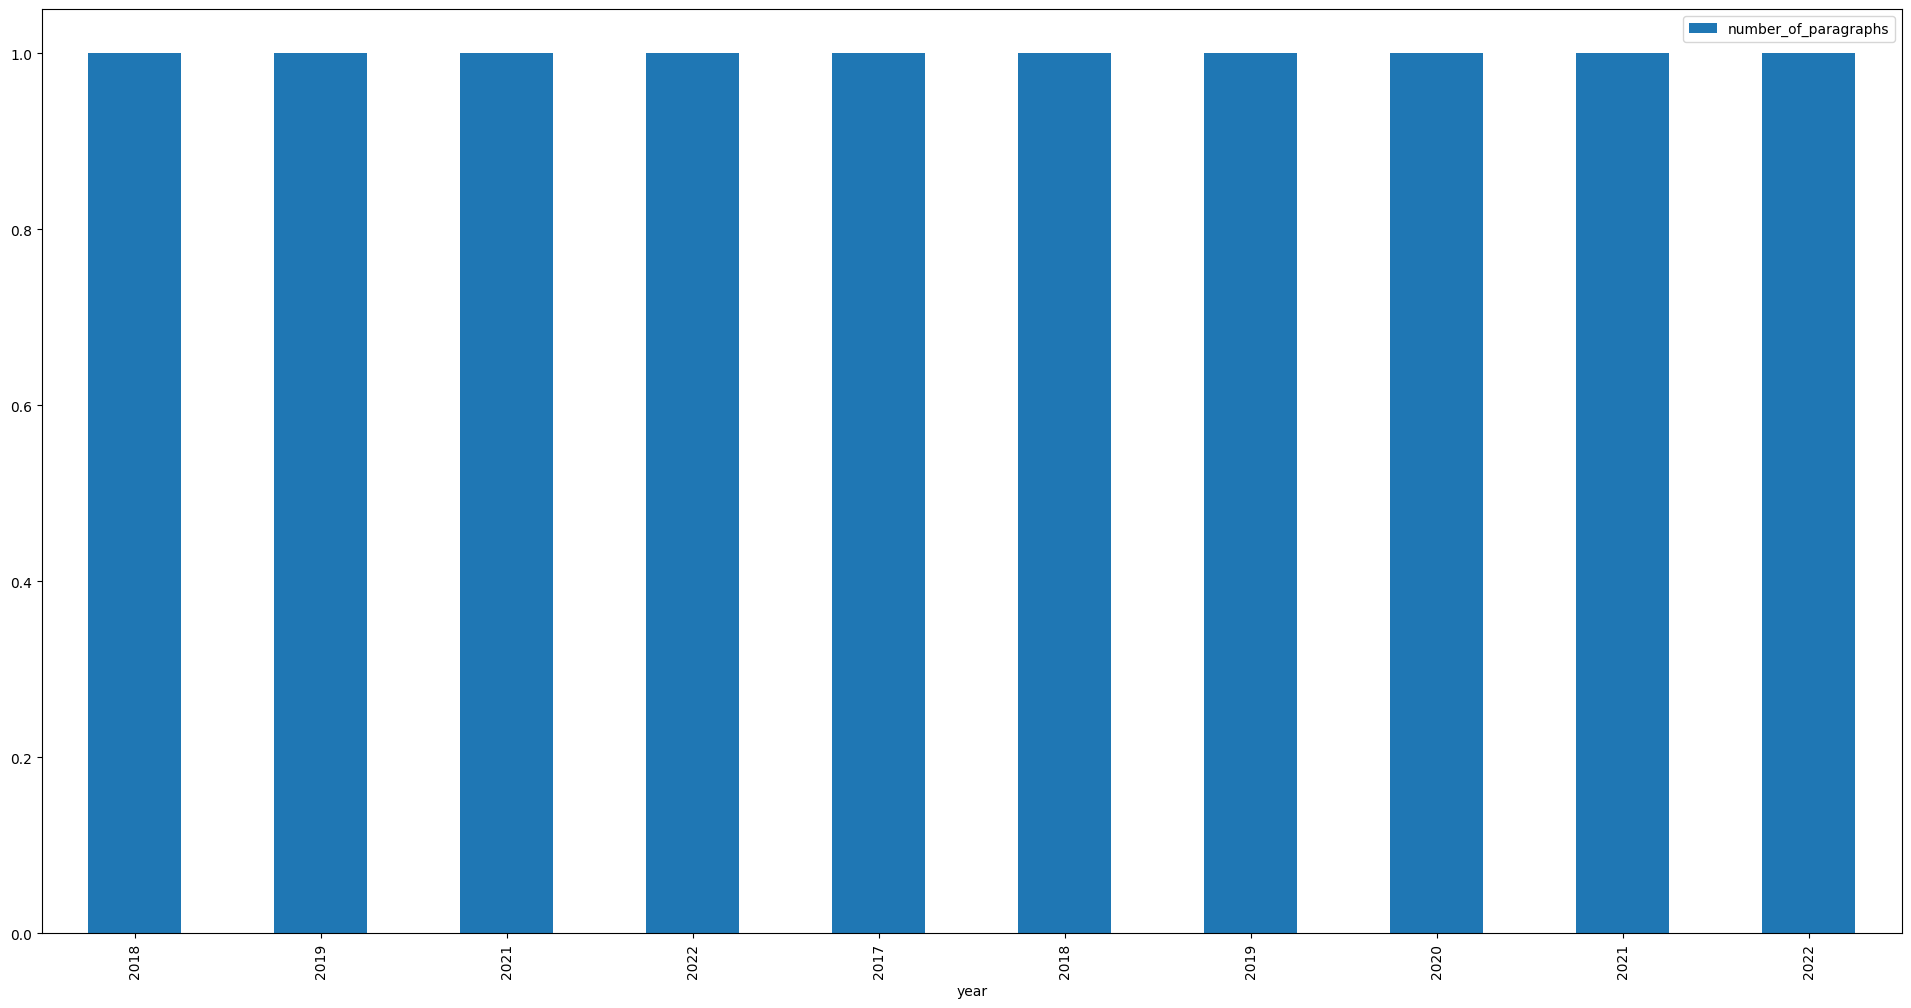

In [12]:
import matplotlib
df["paragraphs"] = df["clean_doc"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].apply(len)

df.groupby('year').agg({'number_of_paragraphs': 'mean'}).plot.bar(figsize=(24,12))

## 4b) Nonnegative matrix factorization (NMF) preprocessing

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# todo:change stop words to de
from spacy.lang.de.stop_words import STOP_WORDS as stopwords

tfidf_text_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['clean_doc'])
tfidf_text_vectors.shape

# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "year": year }
                             for paragraphs, year in zip(df["paragraphs"], df["year"])
                             for paragraph in paragraphs if paragraph])

tfidf_para_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape

(619, 16450)

## 4c) Nonnegative matrix factorization (NMF) implementation on clean_doc

In [14]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names())
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic 00
  handelsblatt (0.57)
  strom (0.46)
  prozent (0.43)
  unternehmen (0.32)
  deutschland (0.32)

Topic 01
  the (4.59)
  and (3.00)
  to (2.57)
  of (2.22)
  we (1.83)

Topic 02
  rwe (3.76)
  eon (1.23)
  innogy (0.75)
  euro (0.66)
  milliarden (0.63)

Topic 03
  wasserstoff (3.30)
  co2 (0.51)
  erdgas (0.43)
  elektrolyse (0.35)
  grunen (0.31)

Topic 04
  taz (0.80)
  tageszeitung (0.60)
  innen (0.52)
  co (0.32)
  klimaschutz (0.31)

Topic 05
  aktien (1.51)
  aktie (1.06)
  dax (0.79)
  prozent (0.60)
  unternehmen (0.57)

Topic 06
  eeg (2.17)
  umlage (1.64)
  cent (0.66)
  euro (0.57)
  milliarden (0.47)

Topic 07
  ppas (2.38)
  ppa (1.93)
  marktoffensive (0.79)
  green (0.68)
  energien (0.63)

Topic 08
  dena (0.89)
  biomethan (0.80)
  co2 (0.28)
  abbildung (0.25)
  de (0.24)

Topic 09
  russland (0.82)
  deutschland (0.50)
  china (0.49)
  welt (0.49)
  rubrik (0.40)


array([12.12290926,  8.94259491,  6.59803091,  9.00314966, 17.27580418,
        8.86220902,  8.70538714,  4.81762   , 11.4925999 , 12.17969502])

## 4d) Nonnegative matrix factorization (NMF) implementation on paragraphs

In [15]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names())
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic 00
  handelsblatt (0.56)
  strom (0.45)
  unternehmen (0.31)
  euro (0.30)
  ene (0.26)

Topic 01
  the (4.54)
  and (2.97)
  to (2.54)
  of (2.19)
  we (1.83)

Topic 02
  rwe (3.73)
  eon (1.22)
  innogy (0.75)
  euro (0.63)
  schmitz (0.63)

Topic 03
  wasserstoff (3.20)
  co2 (0.50)
  erdgas (0.43)
  elektrolyse (0.35)
  grunen (0.30)

Topic 04
  taz (0.77)
  tageszeitung (0.57)
  innen (0.51)
  co (0.32)
  klimaschutz (0.31)

Topic 05
  aktien (1.53)
  aktie (1.08)
  dax (0.80)
  unternehmen (0.55)
  euro (0.53)

Topic 06
  eeg (2.13)
  umlage (1.62)
  cent (0.64)
  euro (0.53)
  milliarden (0.46)

Topic 07
  ppas (2.44)
  ppa (1.97)
  marktoffensive (0.82)
  green (0.69)
  energien (0.61)

Topic 08
  dena (0.88)
  biomethan (0.82)
  co2 (0.27)
  abbildung (0.26)
  de (0.24)

Topic 09
  russland (0.87)
  china (0.49)
  welt (0.48)
  rubrik (0.40)
  gas (0.39)


array([12.02470121,  9.18503082,  6.90066959,  9.28609455, 17.16951696,
        8.752146  ,  8.8748859 ,  4.81499877, 11.24091294, 11.75104325])

## 4e) LDA

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn

count_para_vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

display_topics(lda_para_model, count_para_vectorizer.get_feature_names())

W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


lda_display = pyLDAvis.sklearn.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

lda_tsne_display = pyLDAvis.sklearn.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False, mds='tsne')
pyLDAvis.display(lda_tsne_display)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload



Topic 00
  quartier (0.55)
  strom (0.55)
  gebaude (0.50)
  2019 (0.50)
  energien (0.46)

Topic 01
  taz (1.01)
  tageszeitung (0.74)
  strom (0.49)
  innen (0.44)
  2022 (0.44)

Topic 02
  euro (1.92)
  handelsblatt (1.79)
  unternehmen (1.52)
  rwe (1.13)
  strom (0.97)

Topic 03
  dena (2.15)
  energiewende (0.77)
  energie (0.68)
  000 (0.66)
  transition (0.53)

Topic 04
  wasserstoff (0.71)
  mussen (0.45)
  deutschen (0.39)
  grunen (0.39)
  welt (0.36)

Topic 05
  the (5.99)
  and (3.79)
  of (3.39)
  to (2.80)
  for (1.81)

Topic 06
  xa0 (14.97)
  we (4.70)
  to (3.72)
  the (3.39)
  that (3.14)

Topic 07
  energy (3.05)
  communities (1.81)
  technologien (1.29)
  2021 (1.13)
  digitale (0.96)

Topic 08
  netzbetreiber (0.69)
  flexibilitat (0.67)
  aktien (0.56)
  modell (0.52)
  verbraucher (0.52)

Topic 09
  co2 (0.82)
  eeg (0.57)
  strom (0.54)
  2030 (0.51)
  energien (0.48)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/past/builtins/misc.py:45: Deprec

## 4f) Word cloud visualization

In [17]:
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
#
# def wordcloud_topics(model, features, no_top_words=40):
#     for topic, words in enumerate(model.components_):
#         size = {}
#         largest = words.argsort()[::-1] # invert sort order
#         for i in range(0, no_top_words):
#             size[features[largest[i]]] = abs(words[largest[i]])
#         wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
#         wc.generate_from_frequencies(size)
#         plt.figure(figsize=(12,12))
#         plt.imshow(wc, interpolation='bilinear')
#         plt.axis("off")
#         # if you don't want to save the topic model, comment the next line
#         plt.savefig(f'topic{topic}.png')
#
# wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names())
# wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names())

## 4g) Time development of models

  0%|          | 0/5 [00:00<?, ?it/s]

<AxesSubplot: xlabel='year'>

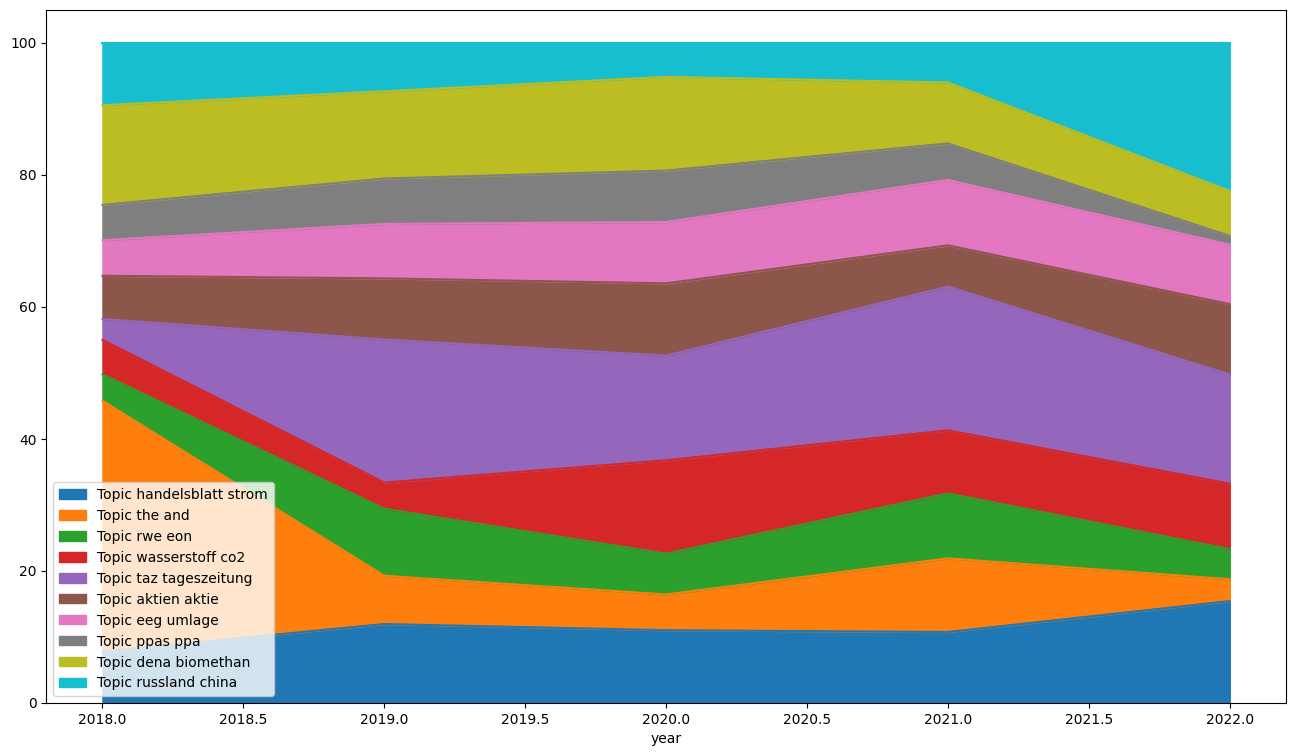

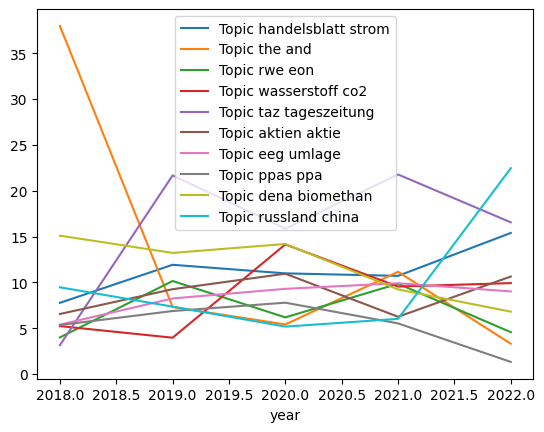

In [18]:
import numpy as np
from tqdm.auto import tqdm

W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

paragraph_df['year'] = paragraph_df['year'].fillna(0)
paragraph_df['year'] = paragraph_df['year'].astype(int)
paragraph_df = paragraph_df[paragraph_df.year != 0]
paragraph_df = paragraph_df[paragraph_df.year != 2017]


# before_1990 = np.array(paragraph_df["year"] < 1990)
# after_1990 = ~ before_1990
#
# W_para_matrix_early = nmf_para_model.transform(tfidf_para_vectors[before_1990])
# W_para_matrix_late  = nmf_para_model.transform(tfidf_para_vectors[after_1990])
# print(W_para_matrix_early.sum(axis=0)/W_para_matrix_early.sum()*100.0)
# print(W_para_matrix_late.sum(axis=0)/W_para_matrix_late.sum()*100.0)
#
# ['%1.2f'%x for x in W_para_matrix_early.sum(axis=0)/W_para_matrix_early.sum()*100.0]
# ['%1.2f'%x for x in W_para_matrix_early.sum(axis=0)/W_para_matrix_late.sum()*100.0]

year_data = []

for year in tqdm(np.unique(np.unique(paragraph_df["year"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["year"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

topic_names = []
voc = tfidf_para_vectorizer.get_feature_names()

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)


df_year = pd.DataFrame(year_data, columns=["year"] + topic_names).set_index("year")
df_year.plot.area(figsize=(16,9))

[f'Topic {count_para_vectorizer.get_feature_names()[words.argsort()[-1]]}' for words in nmf_para_model.components_]

df_year.plot()